In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

C:\Users\ankum\AppData\Local\Temp\ipykernel_1084\4123763958.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# loading dataset

In [29]:
hb=pd.read_csv('hotel_bookings.csv')

# data cleaning

In [30]:
hb.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,Confirmed,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
1,Resort Hotel,Confirmed,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
2,Resort Hotel,Confirmed,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
3,Resort Hotel,Confirmed,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
4,Resort Hotel,Confirmed,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-2015


In [31]:
hb.shape

(119390, 32)

In [32]:
hb.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [33]:
hb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  object 
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [34]:
# Dropping the rows where combining values of adults, babies and children columns is 0, because it simply means no bookings were made
hb.drop(hb[hb['adults']+hb['babies']+hb['children'] == 0].index, inplace = True)

In [35]:
hb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119210 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119210 non-null  object 
 1   is_canceled                     119210 non-null  object 
 2   lead_time                       119210 non-null  int64  
 3   arrival_date_year               119210 non-null  int64  
 4   arrival_date_month              119210 non-null  object 
 5   arrival_date_week_number        119210 non-null  int64  
 6   arrival_date_day_of_month       119210 non-null  int64  
 7   stays_in_weekend_nights         119210 non-null  int64  
 8   stays_in_week_nights            119210 non-null  int64  
 9   adults                          119210 non-null  int64  
 10  children                        119206 non-null  float64
 11  babies                          119210 non-null  int64  
 12  meal                 

In [25]:
# Changing datatype of column 'reservation_status_date' from object to datetime
hb['reservation_status_date']=pd.to_datetime(hb['reservation_status_date'],format='%d-%m-%Y')
hb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119210 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119210 non-null  object        
 1   is_canceled                     119210 non-null  object        
 2   lead_time                       119210 non-null  int64         
 3   arrival_date_year               119210 non-null  int64         
 4   arrival_date_month              119210 non-null  object        
 5   arrival_date_week_number        119210 non-null  int64         
 6   arrival_date_day_of_month       119210 non-null  int64         
 7   stays_in_weekend_nights         119210 non-null  int64         
 8   stays_in_week_nights            119210 non-null  int64         
 9   adults                          119210 non-null  int64         
 10  children                        119206 non-null  float64     

In [36]:
#looking for null values 
hb.isnull().sum().sort_values(ascending = False)

company                           112442
agent                              16280
country                              478
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

In [37]:
#dropping and null values and chechking if all null values removed
hb.drop(['agent', 'company'],axis = 1, inplace = True)
hb.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           478
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car

In [38]:
#filling the missing values in country column with mode
hb['country'].fillna(hb['country'].mode()[0], inplace=True) 
hb.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          4
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [39]:
#filling the missing values in children column 
hb['children'].fillna(hb['children'].mean(),inplace=True)
hb.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [40]:
# Checking number of duplicate values in the dataset
len(hb[hb.duplicated()])

32025

In [41]:
# Dropping the duplicate rows from dataset
hb = hb.drop_duplicates()
len(hb[hb.duplicated()])

0

In [42]:
hb.shape

(87185, 30)

In [43]:
# Adding total staying days in hotels
hb['total_stay'] = hb['stays_in_weekend_nights']+hb['stays_in_week_nights']
len(hb['total_stay'])

87185

In [44]:
# Adding total people number as column, i.e. total types of person = num of adults + children + babies
hb['total_people'] = hb['adults']+hb['babies']+hb['children']
len(hb['total_people'])

87185

# handling outliers

In [45]:
#since adr(averave daily rate) is our target column to remove the outlier is necesarry
hb['adr'].describe()

count    87185.000000
mean       106.531928
std         54.884441
min         -6.380000
25%         72.250000
50%         98.250000
75%        134.100000
max       5400.000000
Name: adr, dtype: float64

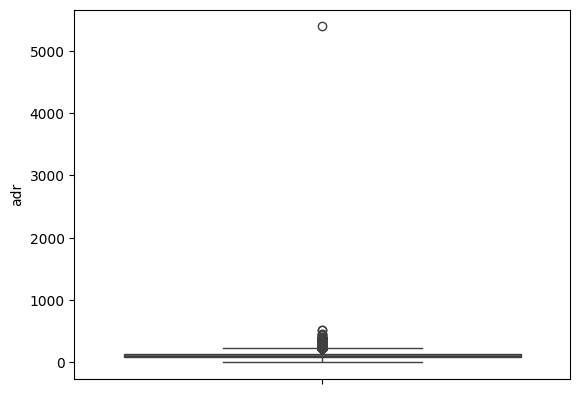

In [46]:
sns.boxplot(hb.adr)
plt.show()

In [47]:
hb[hb['adr'] < 5000]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stay,total_people
0,Resort Hotel,Confirmed,342,2015,July,27,1,0,0,2,...,No Deposit,0,Transient,0.00,0,0,Check-Out,01-07-2015,0,2.0
1,Resort Hotel,Confirmed,737,2015,July,27,1,0,0,2,...,No Deposit,0,Transient,0.00,0,0,Check-Out,01-07-2015,0,2.0
2,Resort Hotel,Confirmed,7,2015,July,27,1,0,1,1,...,No Deposit,0,Transient,75.00,0,0,Check-Out,02-07-2015,1,1.0
3,Resort Hotel,Confirmed,13,2015,July,27,1,0,1,1,...,No Deposit,0,Transient,75.00,0,0,Check-Out,02-07-2015,1,1.0
4,Resort Hotel,Confirmed,14,2015,July,27,1,0,2,2,...,No Deposit,0,Transient,98.00,0,1,Check-Out,03-07-2015,2,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,Confirmed,23,2017,August,35,30,2,5,2,...,No Deposit,0,Transient,96.14,0,0,Check-Out,06-09-2017,7,2.0
119386,City Hotel,Confirmed,102,2017,August,35,31,2,5,3,...,No Deposit,0,Transient,225.43,0,2,Check-Out,07-09-2017,7,3.0
119387,City Hotel,Confirmed,34,2017,August,35,31,2,5,2,...,No Deposit,0,Transient,157.71,0,4,Check-Out,07-09-2017,7,2.0
119388,City Hotel,Confirmed,109,2017,August,35,31,2,5,2,...,No Deposit,0,Transient,104.40,0,0,Check-Out,07-09-2017,7,2.0


# data analysis and visualization

Chart - 1 - Pie Chart for most preferred hotel

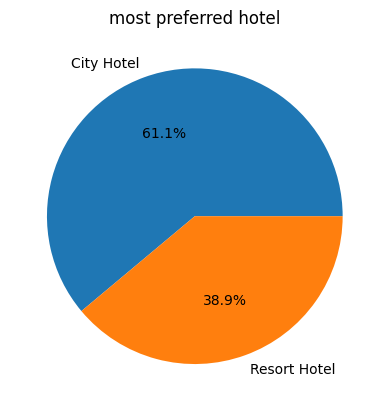

In [57]:
p_hotel=hb['hotel'].value_counts().reset_index()
plt.pie(p_hotel['count'],labels=p_hotel['hotel'],autopct='%0.1f%%')
plt.title('most preferred hotel')
plt.show()

# Chart - 2 - Hotel type with highest adr

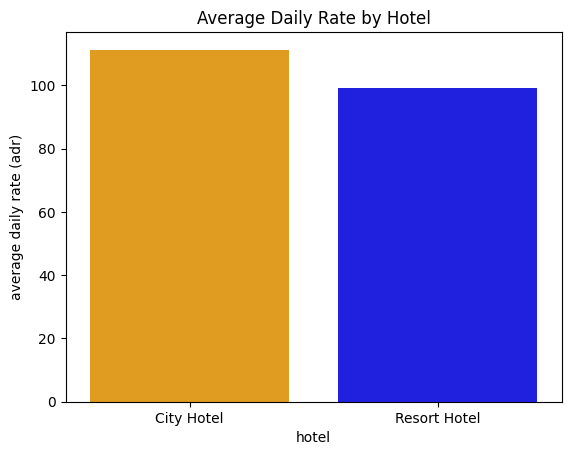

In [91]:
h_adr=hb.groupby('hotel') ['adr'].mean().round(2).reset_index()
sns.barplot(data=h_adr,x='hotel',y='adr',palette=['orange','blue'])
plt.ylabel('average daily rate (adr)')
plt.title('Average Daily Rate by Hotel')
plt.show()

# Chart - 3 - Percentage of repeated guests

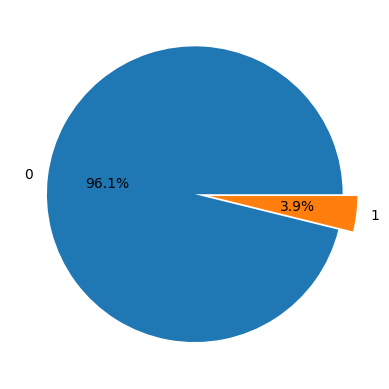

In [83]:
r_guest=hb['is_repeated_guest'].value_counts().reset_index()
plt.pie(r_guest['count'],labels=r_guest['is_repeated_guest'],autopct='%0.1f%%',explode=[0,0.1])
plt.show()

# chart - 4 - most preferred meal type

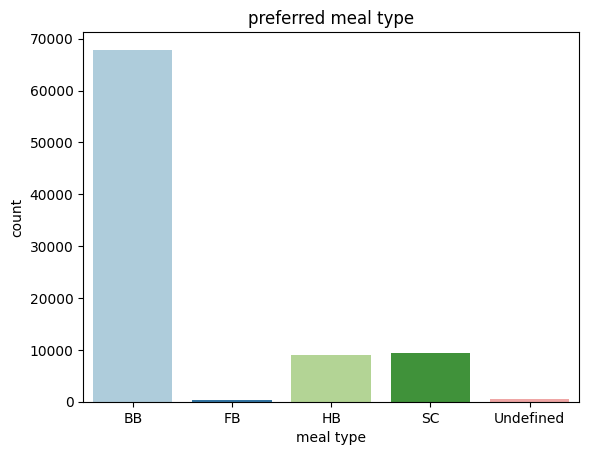

In [146]:
c_palette=sns.color_palette("Paired")
sns.countplot(x=hb['meal'],palette=c_palette)
plt.xlabel('meal type')
plt.title('preferred meal type')
plt.show()
#   BB - (Bed and Breakfast)
#   HB - (Half Board)
#   FB - (Full Board)
#   SC - (Self Catering)

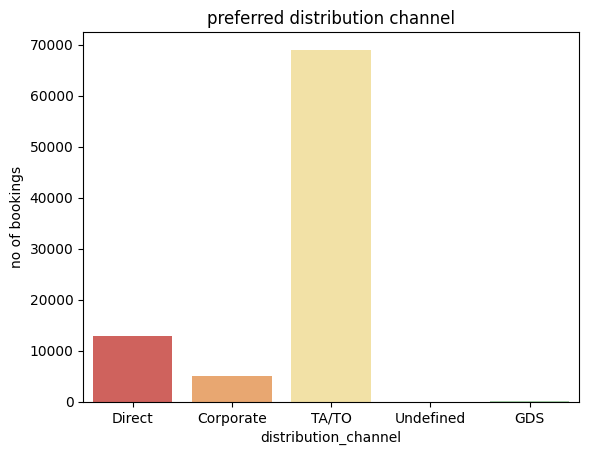

In [169]:
c_palette=sns.color_palette("Spectral")
sns.countplot(x=hb['distribution_channel'],palette=c_palette)
plt.title('preferred distribution channel')
plt.ylabel('no of bookings')
plt.show()

# Chart - 6 - Mostly used Distribution channel and Bar plot for Relationship of Distribution channel and ADR

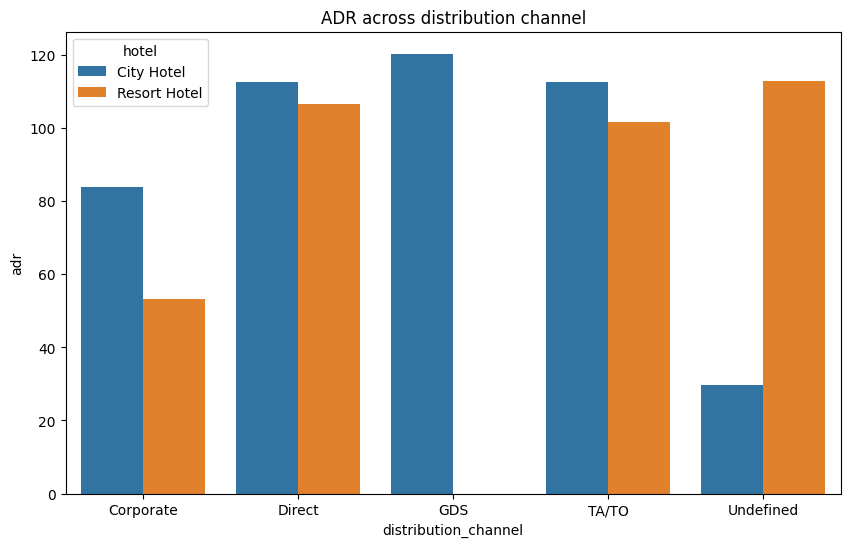

In [170]:
# Visualizing with the help of bar plot for checking relationship between ADR and distribution channel
# Using group by on distribution channel and hotel
dis_adr=hb.groupby(['distribution_channel','hotel']) ['adr'].mean().reset_index().round(2)
plt.figure(figsize=(10,6))
sns.barplot(data=dis_adr,x='distribution_channel',y='adr',hue='hotel')
plt.title('ADR across distribution channel')
plt.show()

# Chart - 7 - Bookings by Month 

In [114]:
bookings_by_month=hb['arrival_date_month'].value_counts().reset_index()
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
bookings_by_month['arrival_date_month']=pd.Categorical(bookings_by_month['arrival_date_month'],categories = months, ordered = True)
bookings_by_month.sort_values('arrival_date_month')

,arrival_date_month,count
11,January,4681
8,February,6074
5,March,7484
3,April,7895
2,May,8342
4,June,7755
1,July,10038
0,August,11239
7,September,6680
6,October,6919


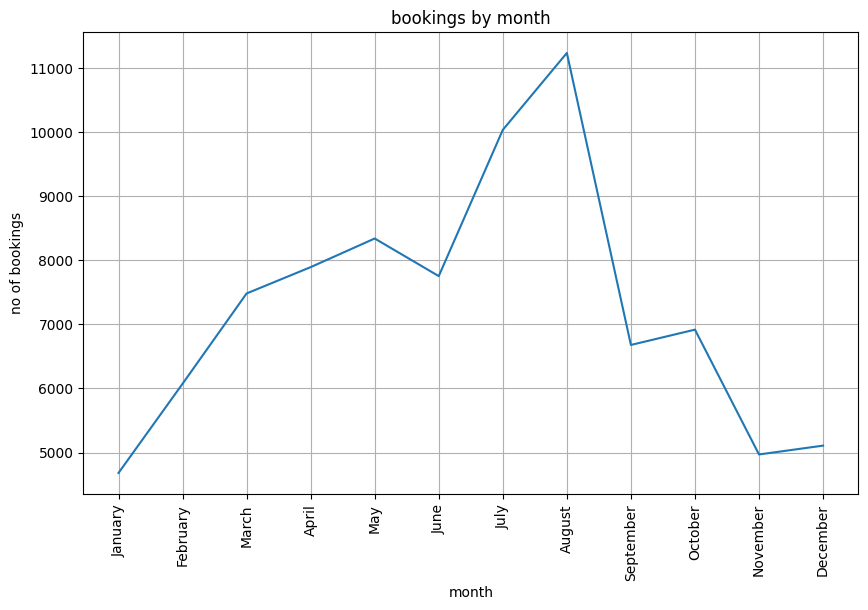

In [171]:
plt.figure(figsize=(10,6))
sns.lineplot(data=bookings_by_month,x='arrival_date_month',y='count')
plt.xlabel('month')
plt.ylabel('no of bookings')
plt.grid()
plt.xticks(rotation=90)
plt.title('bookings by month')
plt.show()

# ADR across different months

In [125]:
month_adr=hb.groupby(['arrival_date_month','hotel'],as_index=False) ['adr'].mean().round(2)
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month_adr['arrival_date_month']=pd.Categorical(month_adr['arrival_date_month'],categories = months, ordered = True)
month_adr.sort_values('arrival_date_month')

,arrival_date_month,hotel,adr
8,January,City Hotel,85.27
9,January,Resort Hotel,49.20
6,February,City Hotel,89.27
7,February,Resort Hotel,54.14
15,March,Resort Hotel,57.61
14,March,City Hotel,95.20
0,April,City Hotel,117.32
1,April,Resort Hotel,79.31
17,May,Resort Hotel,80.55
16,May,City Hotel,128.05


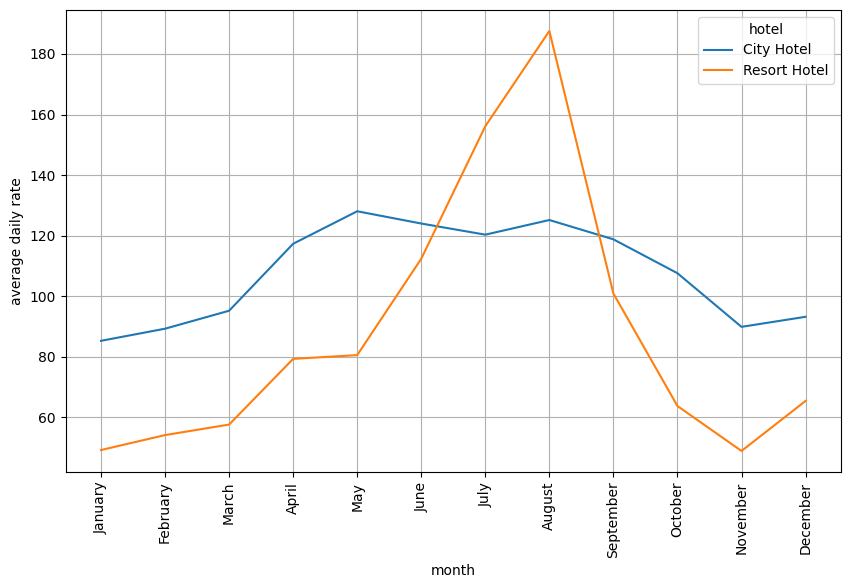

In [128]:
plt.figure(figsize=(10,6))
sns.lineplot(data=month_adr,x='arrival_date_month',y='adr',hue='hotel')
plt.ylabel('average daily rate')
plt.xlabel('month')
plt.xticks(rotation=90)
plt.grid()
plt.show()

# Room type preference

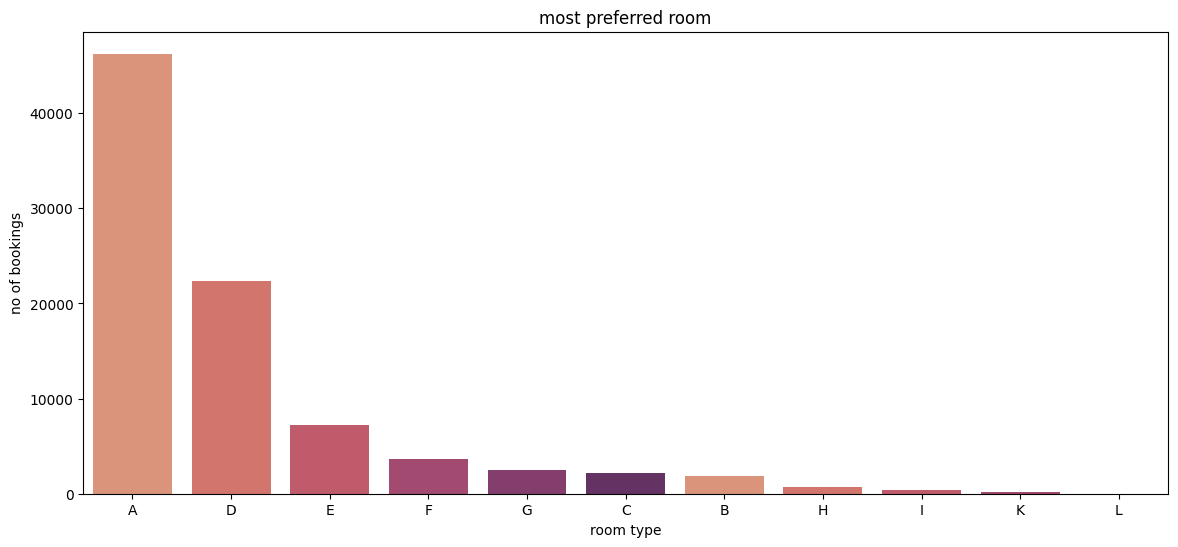

In [172]:
p_room_type=hb['assigned_room_type'].value_counts().reset_index()
plt.figure(figsize = (14,6))
c_palette=sns.color_palette("flare")
sns.barplot(data=p_room_type,x='assigned_room_type',y='count',palette=c_palette)
plt.xlabel('room type')
plt.ylabel('no of bookings')
plt.title('most preferred room')
plt.show()

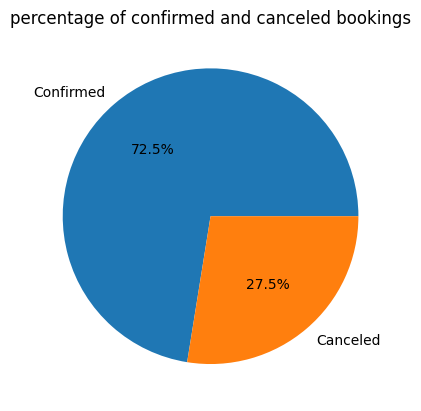

In [154]:
con_can_bookings=hb['is_canceled'].value_counts().reset_index()
plt.pie(con_can_bookings['count'],labels=con_can_bookings['is_canceled'],autopct='%0.1f%%')
plt.title('percentage of confirmed and canceled bookings')
plt.show()

# Hotel wise confirmation and cancelation of the bookings

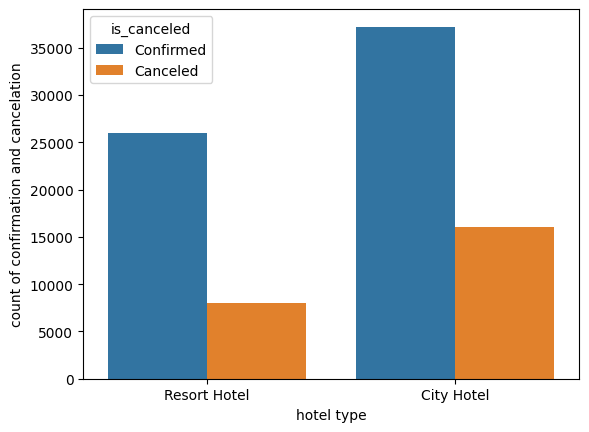

In [166]:
sns.countplot(x=hb['hotel'],hue=hb['is_canceled'])
plt.xlabel('hotel type')
plt.ylabel('count of confirmation and cancelation')
plt.show()

# conclusion

# 1.City hotels are the most preferred hotel type by the guests. So, we can say that City hotels are the busiest hotel in comparison to the resort hotel.

# 2.The average ADR of city hotels is higher as compared to the resort hotels. So, it can be said that these City hotels are generating more revenue than the resort hotels.

# 3.The percentage of repeated guests is very low. Only 3.9% people had revisited the hotels. Rest 96.1% were new guests. So, retention rate is much low.

# 4.Among different types of meals, BB (Bed & Breakfast) is the most preferred type of meal by the guests. So, guests love to opt for this meal type.

# 5.'Direct' and 'TA/TO' have almost equally contribution in ADR in both type of hotels i.e. 'City Hotel' and 'Resort Hotel'. While, GDS has highly contributed in ADR in 'City Hotel' type.

# 6.The mostly used distribution channel for booking is 'TA/TO'(travel agents/ tour operators).

# 7.Majority of the guests have shown interest in the room type 'A'. Room type 'A' is the most preferred room type.

# 8. We can say that July and August months had the most bookings. As July and August generally surrounds in and near the summer vacation.

# 9. For Resort Hotels,ADR is high in the months of June, July,August as compared to City hotels. The reason may be that Customers want to spent their summer vacation in Resort hotels

# 10.More than 1/4th of the overall bookings i.e.approx 27.5% of the tickets got canceled.City hotel is having more number of bookings as compared to Resort hotel.But cancelation percentage is also high in City hotel